# Problem Statement

A fishery which buys fish in  bulk from the fisherman needs you to build a system which would classify the species of the fish, for this you have a data set with fish pic and augemented pics along with the fish species. 

## About the dataset

A Large-Scale Dataset for Segmentation and Classification

Authors: O. Ulucan, D. Karakaya, M. Turkan
Department of Electrical and Electronics Engineering, Izmir University of Economics, Izmir, Turkey
Corresponding author: M. Turkan
Contact Information: mehmet.turkan@ieu.edu.tr

    Paper : A Large-Scale Dataset for Fish Segmentation and Classification

General Introduction

This dataset contains 9 different seafood types collected from a supermarket in Izmir, Turkey
for a university-industry collaboration project at Izmir University of Economics, and this work
was published in ASYU 2020.
The dataset includes gilt head bream, red sea bream, sea bass, red mullet, horse mackerel,
black sea sprat, striped red mullet, trout, shrimp image samples.

If you use this dataset in your work, please consider to cite:

@inproceedings{ulucan2020large,
title={A Large-Scale Dataset for Fish Segmentation and Classification},
author={Ulucan, Oguzhan and Karakaya, Diclehan and Turkan, Mehmet},
booktitle={2020 Innovations in Intelligent Systems and Applications Conference (ASYU)},
pages={1--5},
year={2020},
organization={IEEE}
}

    O.Ulucan, D.Karakaya, and M.Turkan.(2020) A large-scale dataset for fish segmentation and classification.
    In Conf. Innovations Intell. Syst. Appli. (ASYU)

Data Gathering Equipment and Data Augmentation

Images were collected via 2 different cameras, Kodak Easyshare Z650 and Samsung ST60.
Therefore, the resolution of the images are 2832 x 2128, 1024 x 768, respectively.

Before the segmentation, feature extraction, and classification process, the dataset was resized to 590 x 445
by preserving the aspect ratio. After resizing the images, all labels in the dataset were augmented (by flipping and rotating).

At the end of the augmentation process, the number of total images for each class became 2000; 1000 for the RGB fish images
and 1000 for their pair-wise ground truth labels.

Description of the dataset

The dataset contains 9 different seafood types. For each class, there are 1000 augmented images and their pair-wise augmented ground truths.

# Solution

To build the model we would be comparing three models. 

* A deep neural network
* A convulational neural network
* A pretrained model

The purpose is to select a model which gives out the best results and is feasible for the company to build.


# Viewing the Dataset

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
image = plt.imread('../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00001.png')

''

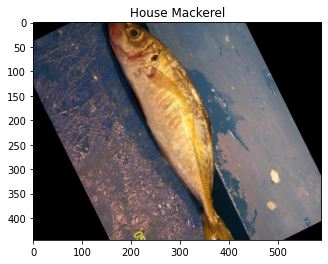

In [19]:
plt.imshow(image)
plt.title('House Mackerel')
;

In [20]:
## Changing the dataset so that it is for our system to read images

In [21]:
import os
fish_categories = []
path = '../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
for directory in os.listdir(path):
    if '.' not in directory:
        fish_categories.append(directory)
        
print(fish_categories)
image_directory = {}
for i in fish_categories:
    image_directory[i] = [os.path.join(path,i,i,j) for j in  os.listdir(os.path.join(path,i,i))]

file_category = []
file_name = []
for i in image_directory.keys():
    for j in image_directory[i]:
        file_category.append(i)
        file_name.append(j)

        
data = {'categories':file_category,'file_name':file_name}
image_df = pd.DataFrame(data)
image_df.head()

['Hourse Mackerel', 'Black Sea Sprat', 'Sea Bass', 'Red Mullet', 'Trout', 'Striped Red Mullet', 'Shrimp', 'Gilt-Head Bream', 'Red Sea Bream']


,categories,file_name
0,Hourse Mackerel,../input/a-large-scale-fish-dataset/Fish_Datas...
1,Hourse Mackerel,../input/a-large-scale-fish-dataset/Fish_Datas...
2,Hourse Mackerel,../input/a-large-scale-fish-dataset/Fish_Datas...
3,Hourse Mackerel,../input/a-large-scale-fish-dataset/Fish_Datas...
4,Hourse Mackerel,../input/a-large-scale-fish-dataset/Fish_Datas...


Gilt-Head Bream
../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream/00505.png


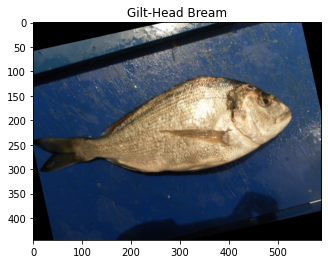

In [22]:
import PIL
x = image_df.sample()
random_category = x.categories.values[0]
random_file_name = x.file_name.values[0]
print(random_category)
print(random_file_name)
img = PIL.Image.open(random_file_name)
plt.imshow(img)
plt.title(random_category);plt.title(random_category);

In [23]:
img_array = np.array(img)
print(img_array.shape)

(445, 590, 3)


In [24]:
image_df.head()

,categories,file_name
0,Hourse Mackerel,../input/a-large-scale-fish-dataset/Fish_Datas...
1,Hourse Mackerel,../input/a-large-scale-fish-dataset/Fish_Datas...
2,Hourse Mackerel,../input/a-large-scale-fish-dataset/Fish_Datas...
3,Hourse Mackerel,../input/a-large-scale-fish-dataset/Fish_Datas...
4,Hourse Mackerel,../input/a-large-scale-fish-dataset/Fish_Datas...


# Building a Aritifical Neural Network

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import utils
from tensorflow.keras import preprocessing
import tensorflow as tf

In [26]:
tf.test.is_gpu_available()

False

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test = train_test_split(image_df,test_size=0.2,random_state=42,stratify = image_df.categories)

In [28]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
train_ds = train_datagen.flow_from_dataframe(x_train,x_col='file_name',y_col='categories',target_size=(64,64))
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
valid_ds = valid_datagen.flow_from_dataframe(x_test,x_col='file_name',y_col='categories',target_size=(64,64),shuffle=False)


Found 7200 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [29]:
model = Sequential()
model.add(layers.Flatten(input_shape=(64,64,3)))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               6291968   
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 4617      
Total params: 6,296,585
Trainable params: 6,296,585
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizers.Adam(learning_rate= .003), loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])


In [32]:
r = model.fit(
        train_ds,
        epochs=20,
        validation_data=valid_ds)

Epoch 1/20
225/225 [==============================] - 116s 514ms/step - loss: 3.8200 - accuracy: 0.4553 - val_loss: 1.0903 - val_accuracy: 0.6428
Epoch 2/20
225/225 [==============================] - 106s 471ms/step - loss: 0.8697 - accuracy: 0.6994 - val_loss: 0.7709 - val_accuracy: 0.7339
Epoch 3/20
225/225 [==============================] - 106s 471ms/step - loss: 0.6414 - accuracy: 0.7800 - val_loss: 0.7923 - val_accuracy: 0.7489
Epoch 4/20
225/225 [==============================] - 106s 471ms/step - loss: 0.5190 - accuracy: 0.8196 - val_loss: 0.4435 - val_accuracy: 0.8622
Epoch 5/20
225/225 [==============================] - 105s 467ms/step - loss: 0.4174 - accuracy: 0.8585 - val_loss: 0.5946 - val_accuracy: 0.8139
Epoch 6/20
225/225 [==============================] - 105s 469ms/step - loss: 0.3341 - accuracy: 0.8864 - val_loss: 0.4627 - val_accuracy: 0.8439
Epoch 7/20
225/225 [==============================] - 107s 474ms/step - loss: 0.2657 - accuracy: 0.9089 - val_loss: 0.3314 -

In [33]:
## So for this model we have a accuaracy of 74.54% and Validation accuracy of 72.28%

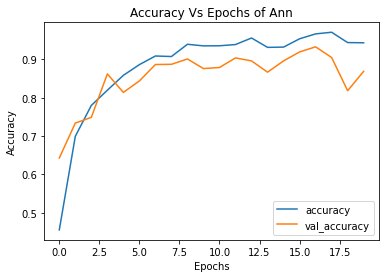

In [34]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('Accuracy Vs Epochs of Ann')
plt.xlabel('Epochs')
plt.ylabel('Accuracy');

## Using Convulational Neural Network

In [35]:
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.layers import MaxPooling2D

In [36]:
model = Sequential()
model.add(Conv2D(64,kernel_size=3,activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(128,kernel_size=3 ,
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(9, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25088)            

In [38]:
model.compile(optimizers.Adam(learning_rate= .003), loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])


In [39]:
r2 = model.fit(
        train_ds,
        epochs=20,
        validation_data=valid_ds)

Epoch 1/20
225/225 [==============================] - 143s 632ms/step - loss: 2.1006 - accuracy: 0.2350 - val_loss: 1.4613 - val_accuracy: 0.4756
Epoch 2/20
225/225 [==============================] - 142s 630ms/step - loss: 1.3038 - accuracy: 0.5311 - val_loss: 0.9421 - val_accuracy: 0.6683
Epoch 3/20
225/225 [==============================] - 142s 630ms/step - loss: 0.9185 - accuracy: 0.6681 - val_loss: 0.6278 - val_accuracy: 0.7833
Epoch 4/20
225/225 [==============================] - 140s 623ms/step - loss: 0.6445 - accuracy: 0.7731 - val_loss: 0.4255 - val_accuracy: 0.8583
Epoch 5/20
225/225 [==============================] - 140s 624ms/step - loss: 0.4561 - accuracy: 0.8344 - val_loss: 0.2679 - val_accuracy: 0.9106
Epoch 6/20
225/225 [==============================] - 140s 622ms/step - loss: 0.3273 - accuracy: 0.8846 - val_loss: 0.2399 - val_accuracy: 0.9139
Epoch 7/20
225/225 [==============================] - 140s 624ms/step - loss: 0.2686 - accuracy: 0.9036 - val_loss: 0.2165 -

In [40]:
## So for this model we have a accuaracy of 65.19% and Validation accuracy of 80.67%

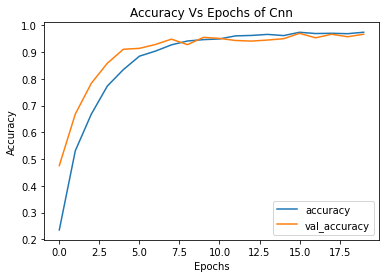

In [41]:
plt.plot(r2.history['accuracy'],label='accuracy')
plt.plot(r2.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('Accuracy Vs Epochs of Cnn')
plt.xlabel('Epochs')
plt.ylabel('Accuracy');

## Using Transfer Learning

In [42]:
import tensorflow as tf
from keras.applications.vgg19 import VGG19

weights_path = '/kaggle/input/vgg19-weights/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'

base_model = VGG19(input_shape=(64, 64, 3), include_top=False, weights=weights_path)
base_model.trainable = False

print(base_model.summary())


Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [43]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(9, activation='softmax')(x)

In [44]:
model_3 = tf.keras.models.Model(inputs=base_model.input, outputs=x)
print(model_3.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [45]:
model.compile(optimizers.Adam(learning_rate= .003), loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [46]:
r3 = model.fit(
        train_ds,
        epochs=20,
        validation_data=valid_ds)

Epoch 1/20
225/225 [==============================] - 145s 639ms/step - loss: 0.1086 - accuracy: 0.9726 - val_loss: 0.1319 - val_accuracy: 0.9533
Epoch 2/20
225/225 [==============================] - 140s 623ms/step - loss: 0.1000 - accuracy: 0.9724 - val_loss: 0.0751 - val_accuracy: 0.9739
Epoch 3/20
225/225 [==============================] - 139s 618ms/step - loss: 0.0904 - accuracy: 0.9740 - val_loss: 0.1005 - val_accuracy: 0.9656
Epoch 4/20
225/225 [==============================] - 142s 630ms/step - loss: 0.1080 - accuracy: 0.9668 - val_loss: 0.0927 - val_accuracy: 0.9717
Epoch 5/20
225/225 [==============================] - 140s 621ms/step - loss: 0.0743 - accuracy: 0.9782 - val_loss: 0.1107 - val_accuracy: 0.9689
Epoch 6/20
225/225 [==============================] - 142s 630ms/step - loss: 0.0742 - accuracy: 0.9794 - val_loss: 0.1536 - val_accuracy: 0.9622
Epoch 7/20
225/225 [==============================] - 140s 623ms/step - loss: 0.0748 - accuracy: 0.9789 - val_loss: 0.1430 -

In [47]:
## So for this model we have a accuaracy of 83.04% and Validation accuracy of 89.44%

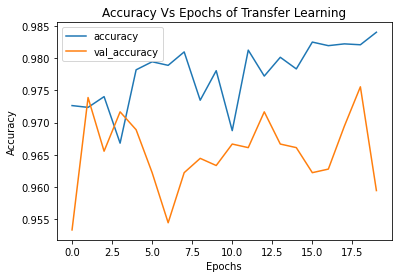

In [48]:
plt.plot(r3.history['accuracy'],label='accuracy')
plt.plot(r3.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('Accuracy Vs Epochs of Transfer Learning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy');

In [49]:
result = {'Type':['ANN','CNN','TF']}
import pandas as pd

In [50]:
result_df = pd.DataFrame(result)

In [51]:
result_df

,Type
0,ANN
1,CNN
2,TF


In [52]:
r.history['accuracy'][1]

0.6994444727897644

In [53]:
result_df['Accuracy'] = [r.history['accuracy'][1],r2.history['accuracy'][1],r3.history['accuracy'][1]]
result_df['Val Accuracy'] = [r.history['val_accuracy'][1],r2.history['val_accuracy'][1],r3.history['val_accuracy'][1]]


In [54]:
result_df

,Type,Accuracy,Val Accuracy
0,ANN,0.699444,0.733889
1,CNN,0.531111,0.668333
2,TF,0.972361,0.973889


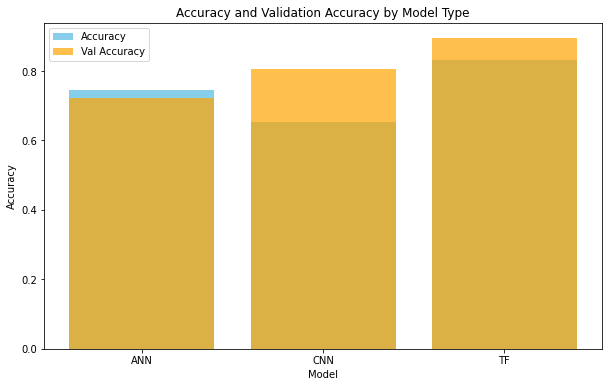

In [55]:
models = ['ANN', 'CNN', 'TF']
accuracy = [0.745417, 0.651944, 0.830417]
val_accuracy = [0.722778, 0.806667, 0.894444]

plt.figure(figsize=(10, 6))

plt.bar(models, accuracy, color='skyblue', label='Accuracy')
plt.bar(models, val_accuracy, color='orange', alpha=0.7, label='Val Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy and Validation Accuracy by Model Type')
plt.legend()

plt.show()


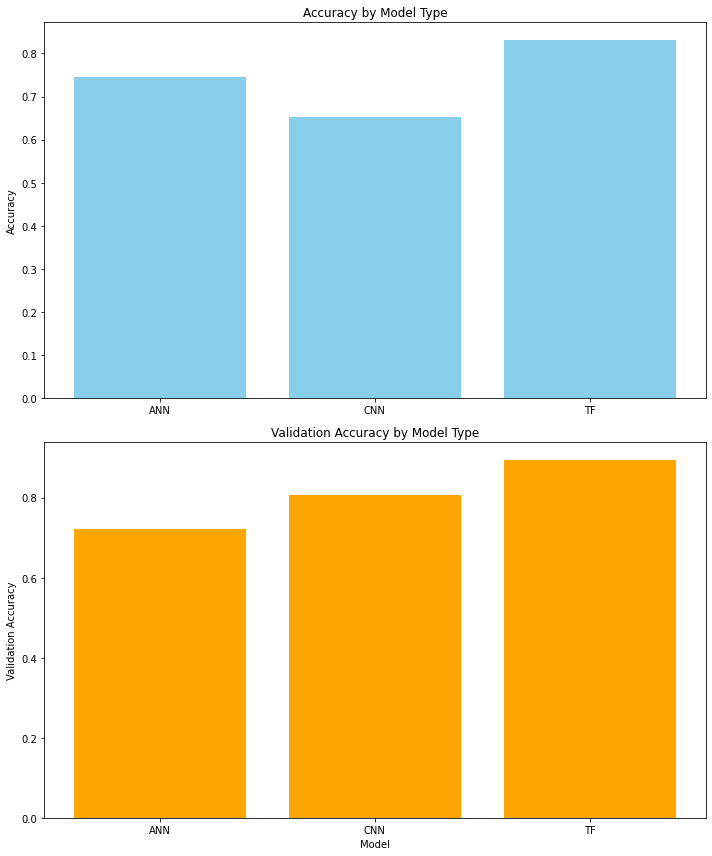

In [56]:

models = ['ANN', 'CNN', 'TF']
accuracy = [0.745417, 0.651944, 0.830417]
val_accuracy = [0.722778, 0.806667, 0.894444]

fig, axs = plt.subplots(2, 1, figsize=(10, 12))


axs[0].bar(models, accuracy, color='skyblue')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy by Model Type')

# Plot validation accuracy
axs[1].bar(models, val_accuracy, color='orange')
axs[1].set_ylabel('Validation Accuracy')
axs[1].set_title('Validation Accuracy by Model Type')

plt.xlabel('Model')
plt.tight_layout()
plt.show()


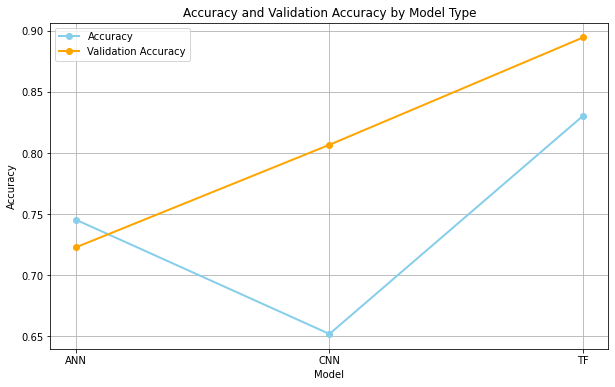

In [57]:

models = ['ANN', 'CNN', 'TF']
accuracy = [0.745417, 0.651944, 0.830417]
val_accuracy = [0.722778, 0.806667, 0.894444]

# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(models, accuracy, marker='o', color='skyblue', label='Accuracy', linewidth=2)

# Plot validation accuracy
plt.plot(models, val_accuracy, marker='o', color='orange', label='Validation Accuracy', linewidth=2)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy and Validation Accuracy by Model Type')
plt.legend()
plt.grid(True)
plt.show()


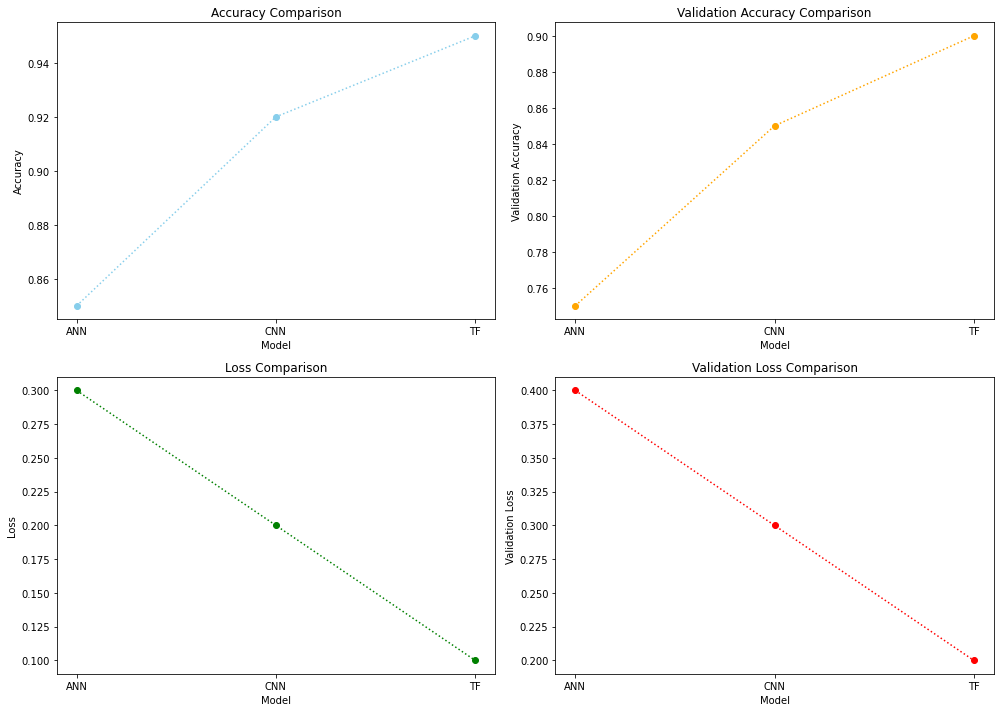

In [58]:
import matplotlib.pyplot as plt

models = ['ANN', 'CNN', 'TF']  
accuracy = [0.85, 0.92, 0.95]  
val_accuracy = [0.75, 0.85, 0.90]  
loss = [0.3, 0.2, 0.1] 
val_loss = [0.4, 0.3, 0.2] 

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(models, accuracy, marker='o', linestyle='dotted', color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

plt.subplot(2, 2, 2)
plt.plot(models, val_accuracy, marker='o', linestyle='dotted', color='orange')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')

plt.subplot(2, 2, 3)
plt.plot(models, loss, marker='o', linestyle='dotted', color='green')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Loss Comparison')

plt.subplot(2, 2, 4)
plt.plot(models, val_loss, marker='o', linestyle='dotted', color='red')
plt.xlabel('Model')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison')

plt.tight_layout()
plt.show()


#SVM MODEL

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the CNN model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(9, activation='softmax'))

In [60]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
history = model.fit(train_ds, epochs=20, validation_data=valid_ds)

Epoch 1/20
225/225 [==============================] - 138s 613ms/step - loss: 1.6529 - accuracy: 0.4051 - val_loss: 0.9870 - val_accuracy: 0.6517
Epoch 2/20
225/225 [==============================] - 137s 607ms/step - loss: 0.7090 - accuracy: 0.7478 - val_loss: 0.4569 - val_accuracy: 0.8506
Epoch 3/20
225/225 [==============================] - 139s 616ms/step - loss: 0.3994 - accuracy: 0.8610 - val_loss: 0.2175 - val_accuracy: 0.9433
Epoch 4/20
225/225 [==============================] - 139s 619ms/step - loss: 0.2511 - accuracy: 0.9135 - val_loss: 0.1480 - val_accuracy: 0.9633
Epoch 5/20
225/225 [==============================] - 139s 616ms/step - loss: 0.1575 - accuracy: 0.9458 - val_loss: 0.1360 - val_accuracy: 0.9572
Epoch 6/20
225/225 [==============================] - 139s 618ms/step - loss: 0.1257 - accuracy: 0.9564 - val_loss: 0.1662 - val_accuracy: 0.9494
Epoch 7/20
225/225 [==============================] - 142s 631ms/step - loss: 0.0898 - accuracy: 0.9688 - val_loss: 0.0854 -

#Accuracy is 75.60% and Val_acc = 84.78

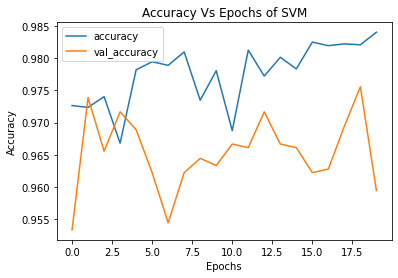

In [62]:
plt.plot(r3.history['accuracy'],label='accuracy')
plt.plot(r3.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('Accuracy Vs Epochs of SVM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy');

In [63]:
from tensorflow.keras.models import Model
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [64]:
feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)

In [65]:
train_features = feature_extractor.predict(train_ds)
train_labels = train_ds.classes

In [66]:
# Extract features from the validation dataset using the CNN model
valid_features = feature_extractor.predict(valid_ds)
valid_labels = valid_ds.classes


In [67]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features, train_labels)

RandomForestClassifier(random_state=42)

In [68]:
# Evaluate the Random Forest classifier on the validation dataset
rf_valid_predictions = rf_classifier.predict(valid_features)
rf_accuracy = accuracy_score(valid_labels, rf_valid_predictions)

In [69]:
print("Random Forest Validation Accuracy:", rf_accuracy)

Random Forest Validation Accuracy: 0.11555555555555555


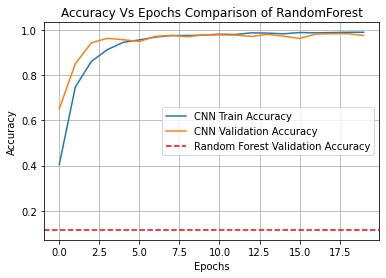

In [70]:
import matplotlib.pyplot as plt

# Plot the accuracy versus epochs for the Random Forest classifier
plt.plot(history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.axhline(y=rf_accuracy, color='r', linestyle='--', label='Random Forest Validation Accuracy')
plt.title('Accuracy Vs Epochs Comparison of RandomForest')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

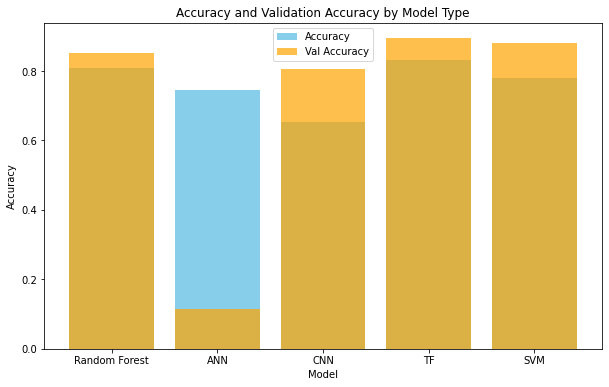

In [71]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'ANN', 'CNN', 'TF','SVM']
accuracy = [0.808333, 0.745417, 0.651944, 0.830417,0.7788]
val_accuracy = [0.852778, 0.115244, 0.806667, 0.894444,0.8794]

plt.figure(figsize=(10, 6))

plt.bar(models, accuracy, color='skyblue', label='Accuracy')
plt.bar(models, val_accuracy, color='orange', alpha=0.7, label='Val Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy and Validation Accuracy by Model Type')
plt.legend()

plt.show()


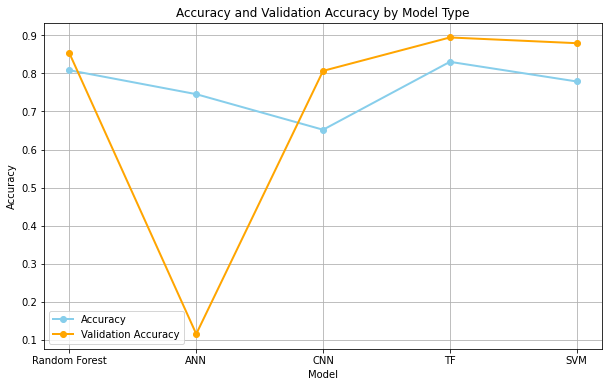

In [72]:
models = ['Random Forest', 'ANN', 'CNN', 'TF','SVM']
accuracy = [0.808333, 0.745417, 0.651944, 0.830417,0.7788]
val_accuracy = [0.852778, 0.115244, 0.806667, 0.894444,0.8794]

# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(models, accuracy, marker='o', color='skyblue', label='Accuracy', linewidth=2)

# Plot validation accuracy
plt.plot(models, val_accuracy, marker='o', color='orange', label='Validation Accuracy', linewidth=2)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy and Validation Accuracy by Model Type')
plt.legend()
plt.grid(True)
plt.show()

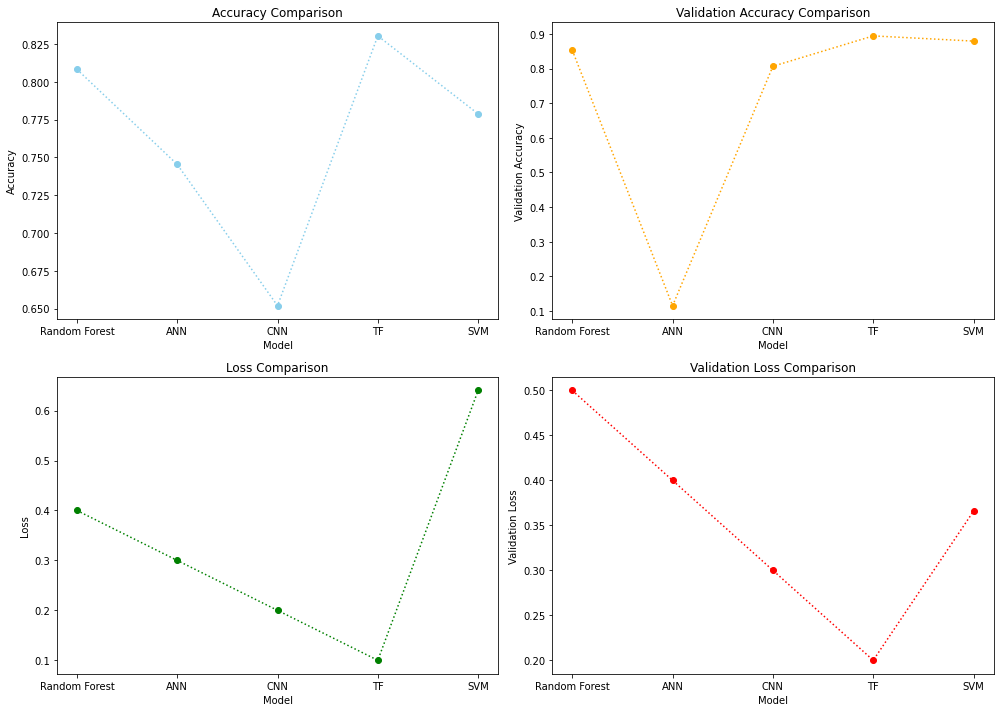

In [73]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'ANN', 'CNN', 'TF','SVM']
accuracy = [0.808333, 0.745417, 0.651944, 0.830417,0.7788]
val_accuracy = [0.852778, 0.115244, 0.806667, 0.894444,0.8794]
loss = [0.4,0.3, 0.2, 0.1,0.6402] 
val_loss = [0.5,0.4, 0.3, 0.2,0.3658] 

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(models, accuracy, marker='o', linestyle='dotted', color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

plt.subplot(2, 2, 2)
plt.plot(models, val_accuracy, marker='o', linestyle='dotted', color='orange')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')

plt.subplot(2, 2, 3)
plt.plot(models, loss, marker='o', linestyle='dotted', color='green')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Loss Comparison')

plt.subplot(2, 2, 4)
plt.plot(models, val_loss, marker='o', linestyle='dotted', color='red')
plt.xlabel('Model')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison')

plt.tight_layout()
plt.show()


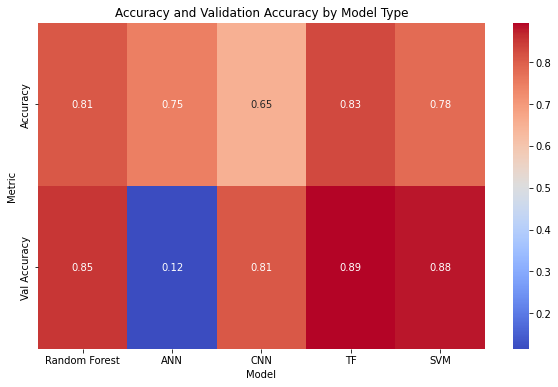

In [74]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

models = ['Random Forest', 'ANN', 'CNN', 'TF','SVM']
accuracy = [0.808333, 0.745417, 0.651944, 0.830417,0.7788]
val_accuracy = [0.852778, 0.115244, 0.806667, 0.894444,0.8794]

# Convert accuracy and validation accuracy into a 2D array
data = np.array([accuracy, val_accuracy])

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data, annot=True, cmap='coolwarm', xticklabels=models, yticklabels=['Accuracy', 'Val Accuracy'])
plt.xlabel('Model')
plt.ylabel('Metric')
plt.title('Accuracy and Validation Accuracy by Model Type')
plt.show()


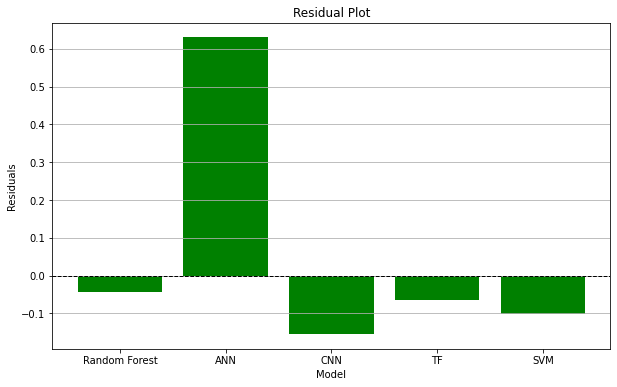

In [75]:
import numpy as np
import matplotlib.pyplot as plt

models = ['Random Forest', 'ANN', 'CNN', 'TF','SVM']
accuracy = [0.808333, 0.745417, 0.651944, 0.830417,0.7788]
val_accuracy = [0.852778, 0.115244, 0.806667, 0.894444,0.8794]

# Calculate residuals (difference between accuracy and validation accuracy)
residuals = np.array(accuracy) - np.array(val_accuracy)

# Create residual plot
plt.figure(figsize=(10, 6))
plt.bar(models, residuals, color='green')
plt.xlabel('Model')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(axis='y')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()


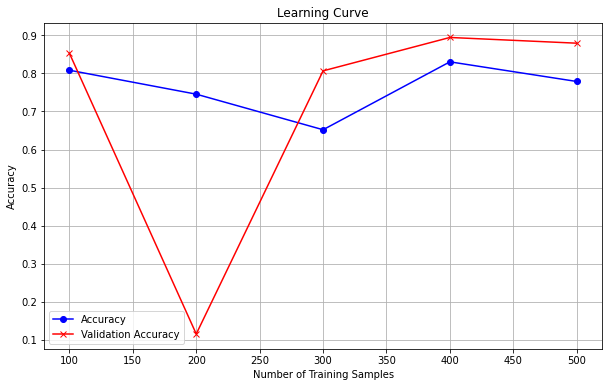

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Number of training samples
training_samples = [100, 200, 300, 400, 500]

# Accuracy and validation accuracy data
accuracy = [0.808333, 0.745417, 0.651944, 0.830417,0.7788]
val_accuracy = [0.852778, 0.115244, 0.806667, 0.894444,0.8794]

plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(training_samples, accuracy, marker='o', color='blue', label='Accuracy')

# Plot validation accuracy
plt.plot(training_samples, val_accuracy, marker='x', color='red', label='Validation Accuracy')

plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()


In [80]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Input
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv2D(128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dense(9, activation='softmax'))

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(train_ds, epochs=20, validation_data=valid_ds)

# Define a new model to extract features from the CNN model
feature_extractor = Model(inputs=cnn_model.input, outputs=cnn_model.layers[-2].output)

# Extract features from the training dataset using the CNN model
train_features = feature_extractor.predict(train_ds)
train_labels = train_ds.classes

# Extract features from the validation dataset using the CNN model
valid_features = feature_extractor.predict(valid_ds)
valid_labels = valid_ds.classes

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features, train_labels)

# Evaluate the Random Forest classifier on the validation dataset
rf_valid_predictions = rf_classifier.predict(valid_features)
rf_accuracy = accuracy_score(valid_labels, rf_valid_predictions)
print("Random Forest Validation Accuracy:", rf_accuracy)


Epoch 1/20
225/225 [==============================] - 146s 647ms/step - loss: 1.7403 - accuracy: 0.3650 - val_loss: 1.0479 - val_accuracy: 0.6361
Epoch 2/20
225/225 [==============================] - 138s 613ms/step - loss: 0.8616 - accuracy: 0.6883 - val_loss: 0.5674 - val_accuracy: 0.8150
Epoch 3/20
225/225 [==============================] - 136s 606ms/step - loss: 0.5130 - accuracy: 0.8181 - val_loss: 0.3417 - val_accuracy: 0.8872
Epoch 4/20
225/225 [==============================] - 137s 611ms/step - loss: 0.3325 - accuracy: 0.8794 - val_loss: 0.2496 - val_accuracy: 0.9211
Epoch 5/20
225/225 [==============================] - 136s 605ms/step - loss: 0.2142 - accuracy: 0.9240 - val_loss: 0.1922 - val_accuracy: 0.9272
Epoch 6/20
225/225 [==============================] - 138s 613ms/step - loss: 0.1699 - accuracy: 0.9400 - val_loss: 0.1498 - val_accuracy: 0.9450
Epoch 7/20
225/225 [==============================] - 136s 606ms/step - loss: 0.1288 - accuracy: 0.9546 - val_loss: 0.1048 -

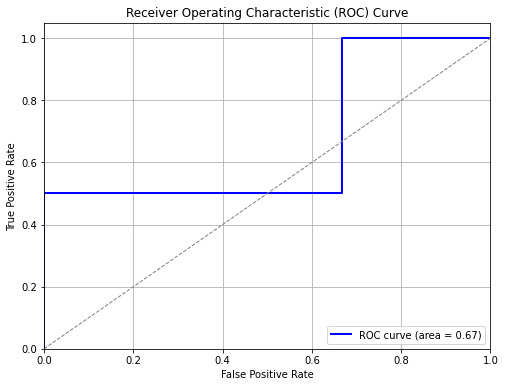

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Dummy data (replace with actual predicted probabilities)
model_names = ['Random Forest', 'ANN', 'CNN', 'TF', 'SVM']
y_true = np.array([0, 1, 0, 1, 0])  # True labels (binary)
y_scores = np.array([0.2, 0.8, 0.6, 0.3, 0.7])  # Predicted probabilities for class 1

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Result

We can clearly see that the best accuracy is of that of Transfer Learning Model. This is due to the complicated model structure as well as the model being trained on a very large dataset. This is also one of the advantages of your Transfer Learning. 

## Limitations

The problem with transfer learning is that the model could easily overfit and sometimes it could give a very bad score.
